In [2]:
from tools.tools_database import *

Dataset = Read_data('./Data/TGV.csv')

map_ = Display_network(Dataset)

map_

e:\CentraleSupelec\Apprentissage_Automatique\prediction-de-retards-tgv-td3-groupe-1\tools\tools_database.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(Dataset[Dataset['gare_depart']==S[i]][Dataset['gare_arrivee']==S[j]]) or  len(Dataset[Dataset['gare_depart']==S[j]][Dataset['gare_arrivee']==S[i]]):
e:\CentraleSupelec\Apprentissage_Automatique\prediction-de-retards-tgv-td3-groupe-1\tools\tools_database.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(Dataset[Dataset['gare_depart']==S[i]][Dataset['gare_arrivee']==S[j]]) or  len(Dataset[Dataset['gare_depart']==S[j]][Dataset['gare_arrivee']==S[i]]):
e:\CentraleSupelec\Apprentissage_Automatique\prediction-de-retards-tgv-td3-groupe-1\tools\tools_database.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if len(Dataset[Dataset['gare_depart']==S[i]][Dataset['gare_arrivee']==S[j]]) or  len(Dataset[Dataset['gare_depart']==S

In [6]:
Dataset = Read_data('./Data/TGV.csv')

map_ = Display_map_delays(Dataset, column='delay')

map_

In [7]:
Dataset = Read_data('./Data/TGV.csv')

map_ = Display_map_delays(Dataset, column='nb_train_retard_arrivee')

map_

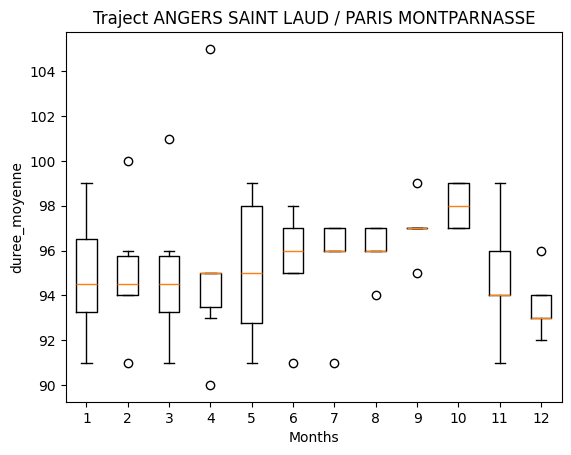

In [8]:
Dataset = Read_data('./Data/TGV.csv')
A = np.unique(Dataset['gare_depart'])

Box_plot_months(Dataset, A[1], 'PARIS MONTPARNASSE', 'duree_moyenne')